In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [4]:
data_2020=pd.read_csv("../data/2020/survey_results_public.csv")
data_2020.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


# Language分析

#### 数据处理

In [5]:
data_2020_language=data_2020[['Respondent','LanguageDesireNextYear','LanguageWorkedWith']]
data_2020_language.columns=['id','desire','now']
a=len(data_2020_language)
data_2020_language

,id,desire,now
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
1,2,Python;Swift,JavaScript;Swift
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift
3,4,NaN,NaN
4,5,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
...,...,...,...
64456,64858,NaN,NaN
64457,64867,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,64898,NaN,NaN
64459,64925,HTML/CSS;Java;JavaScript,HTML/CSS


In [6]:
#把desire和now都为空值的样本剔除

#统计每个样本的缺失值
missing_series=data_2020_language.isnull().sum(axis=1)
data_2020_language['missing_count']=missing_series.values

#去除缺失值大于2的样本
data_2020_language=data_2020_language.loc[data_2020_language['missing_count']<2]

data_2020_language=data_2020_language.reset_index(drop=True)
b=len(data_2020_language)
print("去除了%d个样本"%(a-b))
data_2020_language.head(5)

去除了6682个样本


C:\Users\HAONIA~1\AppData\Local\Temp/ipykernel_73956/2940299722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_language['missing_count']=missing_series.values


,id,desire,now,missing_count
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,0
1,2,Python;Swift,JavaScript;Swift,0
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,0
3,5,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,0
4,6,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,0


In [7]:
#检查单列的缺失值情况
print("desire列的缺失值为：%d"%data_2020_language['desire'].isnull().sum())
print("now列的缺失值为：%d"%data_2020_language['now'].isnull().sum())

desire列的缺失值为：3666
now列的缺失值为：401


In [8]:
#desire列的缺失值使用now列的值进行填充，默认其相同
#now列的空值将其视为之前没有使用web框架的经历，NaN值改为new_bird
data_2020_language['desire'].fillna(data_2020_language['now'],inplace=True)
data_2020_language['now'].replace(np.NaN,"new_bird",inplace=True)
data_2020_language

,id,desire,now,missing_count
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,0
1,2,Python;Swift,JavaScript;Swift,0
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,0
3,5,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,0
4,6,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,0
...,...,...,...,...
57774,64330,C++;HTML/CSS,C++;HTML/CSS,0
57775,64567,Java,new_bird,1
57776,64867,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,0
57777,64925,HTML/CSS;Java;JavaScript,HTML/CSS,0


In [9]:
#开发者可能会使用多种不同的language，为了作多维度数据特征分析，需要将'desire'和'now'中单元格的数据进行拆分成为一行一个特征的数据样式，且其他列数据保持不变
#注意到数据以';'为分隔，将其拆分为多行数据，使用explode
data_2020_language['desire']=data_2020_language['desire'].astype(str)
data_2020_language['desire']=data_2020_language['desire'].apply(lambda x:x.split(';'))
data_2020_language=data_2020_language.explode('desire')
data_2020_language['now']=data_2020_language['now'].astype(str)
data_2020_language['now']=data_2020_language['now'].apply(lambda x:x.split(';'))
data_2020_language=data_2020_language.explode('now')
data_2020_language=data_2020_language.reset_index(drop=True)
data_2020_language.head(5)

,id,desire,now,missing_count
0,1,C#,C#,0
1,1,C#,HTML/CSS,0
2,1,C#,JavaScript,0
3,1,HTML/CSS,C#,0
4,1,HTML/CSS,HTML/CSS,0


In [10]:
print(len(data_2020_language))

1492045


#### 构建加权有向网络

In [11]:
G_desire=nx.DiGraph()
#设定每个受访者可分配的总权重为1
#构建的有向边为 正在用的->想要用的
for i in range(0,50000):
    id=data_2020_language.loc[i,'id']
    if len(data_2020_language.loc[data_2020_language['id']==id])>1:
        weight_per_edge=1/len(data_2020_language[data_2020_language['id']==id])
        if (data_2020_language.loc[i,'now'],data_2020_language.loc[i,'desire']) in G_desire.edges:
            G_desire[data_2020_language.loc[i,'now']][data_2020_language.loc[i,'desire']]['weight']+=weight_per_edge
            #根据id出现的频次分配每条边的权重
        else:
            G_desire.add_edge(data_2020_language.loc[i,'now'],data_2020_language.loc[i,'desire'],weight=weight_per_edge)
    else:
        G_desire.add_edge(data_2020_language.loc[i,'now'],data_2020_language.loc[i,'desire'],weight=1)

In [12]:
#把边列表转为dataframe，方便后续的数据处理与读取
edge_df=pd.DataFrame(columns={'start','end','weight'})
start_list=[]
end_list=[]
weight_list=[]
for start,end,weight in G_desire.edges(data=True):
    start_list.append(start)
    end_list.append(end)
    weight_list.append(list(G_desire.get_edge_data(start,end).values()))
edge_df['start']=start_list
edge_df['end']=end_list
edge_df['weight']=weight_list

#处理后weight列有括号，去除
edge_df['weight']=edge_df['weight'].astype(str)
edge_df['weight']=edge_df['weight'].str.strip('[]')
edge_df['weight']=edge_df['weight'].astype(float)
edge_df['weight_100']=edge_df['weight'].map(lambda x:x*10000)
edge_df

,start,end,weight,weight_100
0,C#,C#,2.224506,22245.057720
1,C#,HTML/CSS,12.997418,129974.184464
2,C#,JavaScript,14.283950,142839.500927
3,C#,PHP,1.809209,18092.090709
4,C#,Go,5.978778,59787.775486
...,...,...,...,...
616,new_bird,Java,0.642857,6428.571429
617,new_bird,JavaScript,0.642857,6428.571429
618,new_bird,Python,0.476190,4761.904762
619,new_bird,SQL,0.476190,4761.904762


In [13]:
#设置节点在网络中的大小
#将以A节点为终点的边的权重汇总，体现出受访者想要用这种语言的欲望强烈，从而体现其在网络中的重要性以及大小
point_df=edge_df.groupby(by=['end'])['weight'].sum().sort_values()
length=len(point_df)
point_list=[]
for i in range(0,length):
    point_list.append(point_df.index[i])
point_size_list=np.logspace(1,length,length,base=2).tolist()
point_size_dict=dict(zip(point_list,point_size_list))
point_size_dict["new_bird"]=2

In [14]:
nx.write_gexf(G_desire,'output/Language_edge.gexf')

#### 网格基本信息

In [15]:
#网络的基本性质
num_nodes=nx.number_of_nodes(G_desire)#节点数
num_edges=nx.number_of_edges(G_desire)#边数
density=nx.density(G_desire)#密度
clusterint_coefficient=nx.average_clustering(G_desire)#平均聚集系数/局部聚集系数   
transitivity=nx.transitivity(G_desire)#传递性/全局聚集系数
reciprocity=nx.reciprocity(G_desire)#互惠性

print('节点个数: ', num_nodes)
print('边个数: ', num_edges)
print('密度: ', density)
print('局部聚集系数: ', clusterint_coefficient)
print('全局聚集系数: ', transitivity)
print('互惠性: ', reciprocity)

节点个数:  26
边个数:  621
密度:  0.9553846153846154
局部聚集系数:  0.971427947436358
全局聚集系数:  0.9816871810267187
互惠性:  0.927536231884058


In [16]:
#中心度和PR值计算
language_centrality=pd.Series(nx.betweenness_centrality(G_desire), name='Betweenness')
language_centrality=pd.Series.to_frame(language_centrality)
language_centrality['Closeness']=pd.Series(nx.closeness_centrality(G_desire))
#language_centrality['PageRank']=pd.Series(nx.pagerank(G_desire,alpha=0.9))
language_centrality['inDegree']=pd.Series(dict(G_desire.in_degree()))
language_centrality['outDegree']=pd.Series(dict(G_desire.out_degree()))
language_betweenness=language_centrality.sort_values('Betweenness', ascending=False)
language_betweenness.head(10)

,Betweenness,Closeness,inDegree,outDegree
R,0.004626,1.000000,26,25
JavaScript,0.004626,1.000000,26,25
Python,0.004626,1.000000,26,25
C++,0.004626,1.000000,26,25
Java,0.004626,1.000000,26,25
C,0.004626,1.000000,26,25
SQL,0.004626,1.000000,26,25
HTML/CSS,0.004626,1.000000,26,25
C#,0.001084,0.961538,25,25
Bash/Shell/PowerShell,0.001084,0.961538,25,25


HTML/CSS HTML/CSS {'weight': 34.86900856789121}
Bash/Shell/PowerShell Bash/Shell/PowerShell {'weight': 18.81082407520308}
TypeScript TypeScript {'weight': 16.44379774616983}
JavaScript JavaScript {'weight': 10.232054988662123}
Python Python {'weight': 10.011377111644968}
PHP PHP {'weight': 8.795114575202605}
C C {'weight': 7.078765611180325}
SQL SQL {'weight': 5.5060125952090235}
Kotlin Kotlin {'weight': 5.3320159051706675}
Go Go {'weight': 5.035946621149222}
Rust Rust {'weight': 4.508576443397871}
Ruby Ruby {'weight': 4.405111207335231}
R R {'weight': 4.165971864334959}
C++ C++ {'weight': 2.745648377195997}
C# C# {'weight': 2.224505772005773}
Scala Scala {'weight': 2.0680136827458253}
VBA VBA {'weight': 2.0404306378598664}
Swift Swift {'weight': 1.8993331128747792}
Assembly Assembly {'weight': 1.1355811003201113}
Dart Dart {'weight': 1.0972493976929614}
Objective-C Objective-C {'weight': 1.0970106707666234}
Java Java {'weight': 1}
Haskell Haskell {'weight': 0.8980717893217892}
Perl Pe

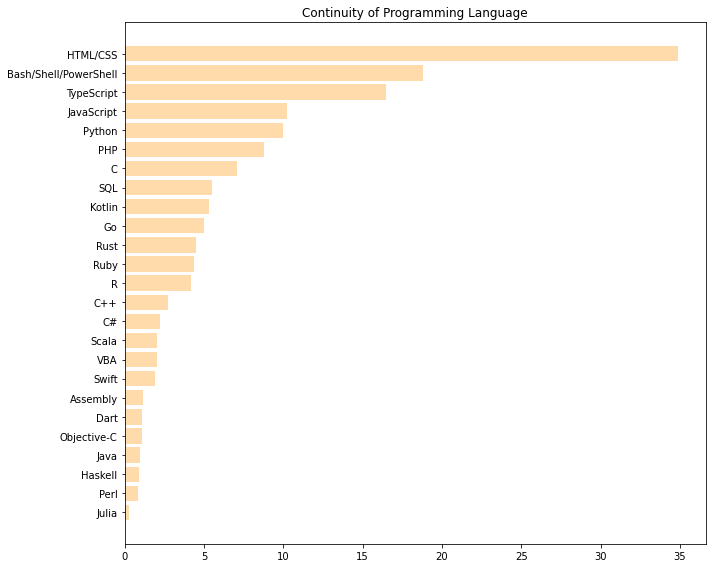

In [41]:
#查看哪些web框架开发者继续使用的比例最高
a = {}
for start,end,weight in sorted(G_desire.edges(data=True), key=lambda x:x[2]['weight'], reverse=True):
    if start==end:
        a[start]=weight['weight']
        print(start,end,weight)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(list(a.keys())[::-1],list(a.values())[::-1], alpha=0.7,color='#FFCB87')
plt.title('Continuity of Programming Language')
plt.tight_layout()

In [26]:
#查看新手倾向于选择哪种框架
for start,end,weight in sorted(G_desire.edges(data=True), key=lambda x:x[2]['weight'], reverse=True):
    if start=='new_bird':
        print(start,end,weight)

new_bird Java {'weight': 0.6428571428571428}
new_bird JavaScript {'weight': 0.6428571428571428}
new_bird Python {'weight': 0.47619047619047616}
new_bird SQL {'weight': 0.47619047619047616}
new_bird R {'weight': 0.3333333333333333}
new_bird C {'weight': 0.14285714285714285}
new_bird C++ {'weight': 0.14285714285714285}
new_bird HTML/CSS {'weight': 0.14285714285714285}


In [19]:
G_desire.nodes()

NodeView(('C#', 'HTML/CSS', 'JavaScript', 'Python', 'Swift', 'Objective-C', 'Java', 'Ruby', 'SQL', 'Scala', 'PHP', 'Rust', 'R', 'Go', 'TypeScript', 'C', 'Bash/Shell/PowerShell', 'Assembly', 'Kotlin', 'VBA', 'Haskell', 'Perl', 'C++', 'Julia', 'Dart', 'new_bird'))

#### 社会网络可视化

In [20]:
#生成各节点的颜色字典
point_color={
    'Assembly': '#6E4C13', 'Bash/Shell/PowerShell': '#012456', 'C': '#555555', 'C#': '#178600',
    'C++': '#f34b7d', 'Dart': '#00B4AB', 'Go': '#00ADD8', 'HTML/CSS': '#e34c26', 'Haskell': '#5e5086',
    'Java': '#b07219', 'JavaScript': '#f1e05a', 'Julia': '#a270ba', 'Kotlin': '#28430A',
    'Objective-C': '#438eff', 'PHP': '#4F5D95', 'Perl': '#0298c3', 'Python': '#3572A5',
    'R': '#198CE7', 'Ruby': '#701516', 'Rust': '#dea584', 'SQL': '#e38c00', 'Scala': '#c22d40',
    'Swift': '#F05138', 'TypeScript': '#2b7489', 'VBA': '#867db1'
}
point_color["new_bird"]='white'

In [22]:
#利用pyvis，优点：交互性强，UI界面直接调整
from IPython.display import display,HTML
from pyvis import network as net
nt=net.Network(height='1000px', width='1000px', bgcolor="black", font_color='white')
sources=edge_df['start']
targets=edge_df['end']
weights=edge_df['weight']

edge_data=zip(sources,targets,weights)

for e in edge_data:
    src=e[0]
    dst=e[1]
    w=e[2]
    s_src=point_size_dict[src]
    s_dst=point_size_dict[dst]
    c_src=point_color[src]
    c_dst=point_color[dst]
    
    nt.add_node(src,title=src,value=s_src,color=c_src)
    nt.add_node(dst,title=dst,value=s_dst,color=c_dst)
    nt.add_edge(src,dst,value=w)

neighbor_map=nt.get_adj_list()

#显示临近节点名称
for node in nt.nodes:
    node['title']+=' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])

nt.hrepulsion()
nt.show_buttons()
nt.show('output/language_pyvis.html')

In [ ]:
edge_data